# Portfolio Project: Online Retail Exploratory Data Analysis with Python

# By Parth Kapoor

# Objectives-
1.Data Cleaning: Handle missing values and remove any unnecessary columns.

2.Basic Statistics: Explore measures of central tendency and dispersion.

3.Data Visualization: Generate plots to visualize different aspects of the data.

4.Sales Trends Analysis: Identify busy months and days of the week.

5.Top-selling Products and Countries: Explore the top-selling products and countries.

6.Outliers and Anomalies: Identify any outliers or anomalies and discuss their impact.


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

file_path = '/home/jovyan/work/Online Retail.xlsx'
df = pd.read_excel(file_path)

%matplotlib inline

In [15]:
df.head(5)   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [17]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [18]:
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


# Data Cleaning
The dataset has the following missing values:

Description: 1,454 missing values
CustomerID: 135,080 missing values

Handling Missing Values
Description: Since this is a relatively small number of missing values compared to the total dataset size, we can drop rows where Description is missing.

CustomerID: A significant portion of the dataset is missing CustomerID. We can either drop these rows or fill in a placeholder value if the analysis allows.

Let's proceed with these steps:

Drop rows with missing Description.
Handle missing CustomerID by dropping those rows, given the large number of missing values.
Additionally, let's remove any redundant columns, if found, but in this case, all columns appear to be relevant.

In [19]:
df_cleaned = df.dropna(subset=['Description'])
df_cleaned = df.dropna(subset=['CustomerID'])
missing_values_cleaned = df_cleaned.isnull().sum()
print(missing_values_cleaned)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# Next Steps
Explore Basic Statistics: Let's explore measures of central tendency (mean, median) and dispersion (standard deviation) for the numeric columns.
Data Visualization: Generate plots to visualize different aspects of the data, such as sales trends over time, top-selling products, and countries.

In [20]:
basic_statistics = df_cleaned.describe()
print(basic_statistics)

            Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000


# Observations
There are some extreme values in the Quantity column, indicated by the large standard deviation and extreme min/max values.
Similarly, UnitPrice has a high standard deviation and extreme max value.
The CustomerID values are within a consistent range.


# Next Steps
Data Visualization:
Histogram for Quantity and UnitPrice.

Time series plot for sales trends over time.

Sales Trends Analysis:
Identify the busiest months and days of the week.

Top-selling Products and Countries:
Explore the top-selling products and countries.

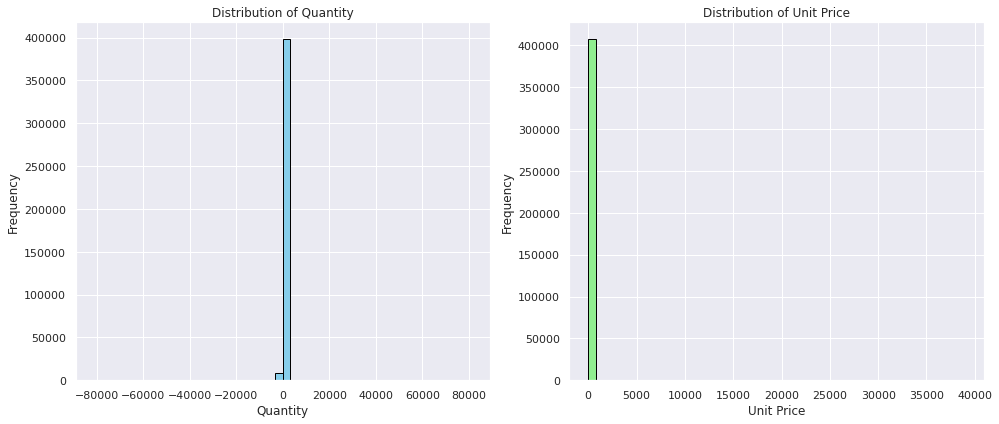

In [21]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Quantity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['UnitPrice'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# The histograms show the distribution of Quantity and Unit Price:

Quantity: The distribution is highly skewed with a long tail on both ends, indicating the presence of extreme values.

Unit Price: The distribution is also skewed, with most unit prices being relatively low but a few very high values.

# Next Steps

Sales Trends Analysis:
Analyze sales trends over time by plotting the total sales per month and per day of the week.

Top-selling Products and Countries:
Identify the top-selling products and countries based on the quantity sold.


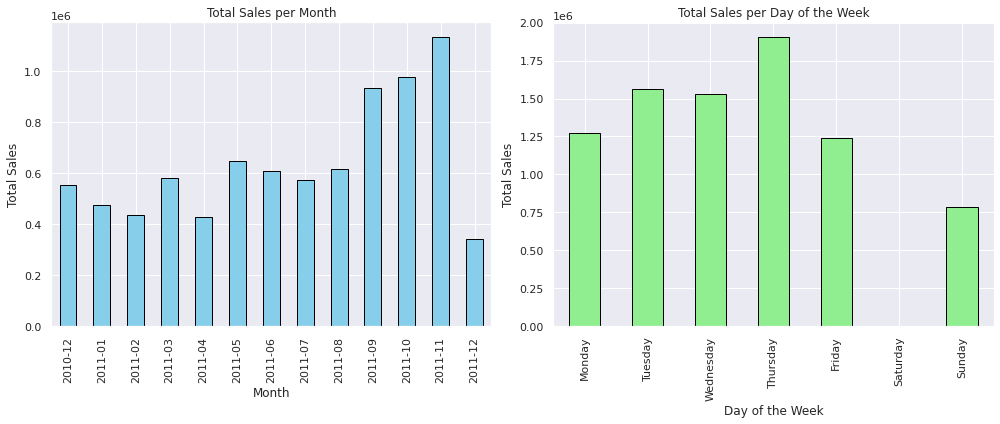

In [22]:
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')
df_cleaned['InvoiceDayOfWeek'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

monthly_sales = df_cleaned.groupby('InvoiceMonth')['TotalSales'].sum()
daily_sales = df_cleaned.groupby('InvoiceDayOfWeek')['TotalSales'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
daily_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Total Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()



The bar plots provide insights into sales trends:

Total Sales per Month: There is a clear seasonal pattern, with higher sales in certain months, likely corresponding to holiday seasons and special events.
Total Sales per Day of the Week: Sales vary throughout the week, with some days showing higher sales than others, which might indicate peak shopping days.

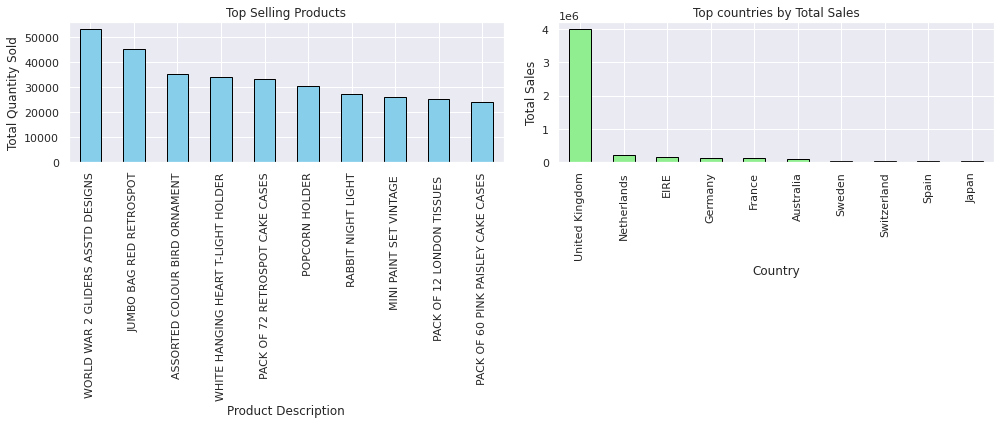

In [29]:
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_countries = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
top_countries.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Insights from Top-Selling Products and Countries
Top-Selling Products: The bar plot displays the top 10 products based on the total quantity sold. These products are highly popular and contribute significantly to the total sales.

Top Countries by Total Sales: The bar plot shows the top 10 countries by total sales. The United Kingdom is the leading market, followed by other countries.

# Next Steps
Identify Outliers and Anomalies: Examine any extreme values or unusual patterns in the data.
Conclusions and Summary: Draw conclusions from the exploratory data analysis and summarize the findings.

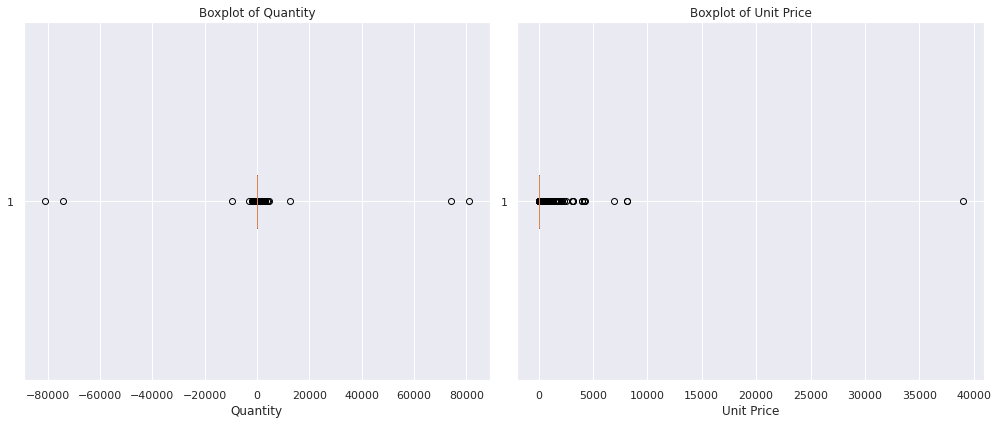

In [35]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.boxplot(df_cleaned['Quantity'], vert=False)
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')

plt.subplot(1,2,2)
plt.boxplot(df_cleaned['UnitPrice'], vert=False)
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')

plt.tight_layout()
plt.show()

# Outliers and Anomalies
The boxplots reveal the presence of outliers in both the Quantity and Unit Price columns:

Quantity: There are several extreme values on both ends, indicating unusually high and low quantities in some transactions.

Unit Price: The boxplot shows a few very high unit prices, suggesting the presence of premium or expensive items.

# Potential Impact of Outliers

Outliers in Quantity: These might represent bulk purchases or returns. They can skew the analysis if not properly accounted for.

Outliers in Unit Price: High unit prices might be for high-value products, which can impact the average sales calculations.

# Conclusions and Summary

From the exploratory data analysis, we can draw the following conclusions:

Sales Trends: There are clear seasonal trends in sales, with certain months and days of the week showing higher sales.

Top-Selling Products: A small number of products contribute significantly to total sales.

Top Countries: The United Kingdom is the primary market, with other countries contributing to a lesser extent.

Outliers: There are notable outliers in both Quantity and Unit Price, which need to be considered in any further analysis or modeling.